In [1]:
import os
import glob
import imageio
import scipy.io
from skimage import feature
from skimage.color import rgb2gray
from skimage.filters import gaussian
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


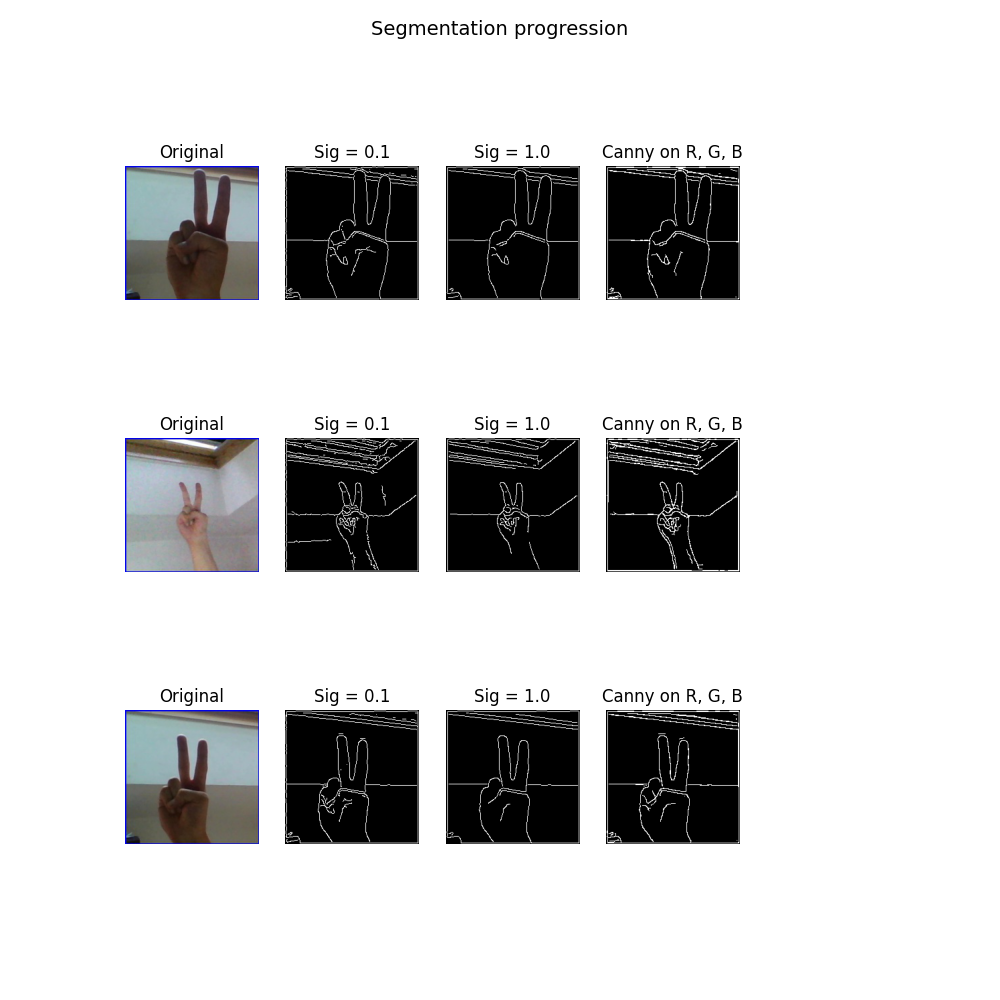

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


In [2]:
framesdir = "../splitDataset/training/V/"
fnames = glob.glob(framesdir + "*.jpg")
fnames = [os.path.basename(name) for name in fnames]

num_different_images = 3

random_indeces = np.random.choice(len(fnames), num_different_images, replace=False)
chosen_fnames = np.take(fnames, random_indeces)

sigma1 = 0.1
sigma2 = 1.0

fig, ax = plt.subplots(num_different_images,5,figsize=(10,10))
fig.suptitle("Segmentation progression", fontsize=14)

for i in range(len(chosen_fnames)):
    original_image = imageio.imread(framesdir + chosen_fnames[i])
    
    # smooth original image with a gaussian filter
    smooth_og = gaussian(original_image, sigma=0.5)
    
    gray_img = rgb2gray(smooth_og)
    
    
    
    # perform canny edge detector on grayscale img using various sigma values
    img_edges_sigma1 = feature.canny(gray_img, sigma=sigma1)
    img_edges_sigma2 = feature.canny(gray_img, sigma=sigma2)
    
    # perform canny edge detector on the different rgb channels of smooth img
    edges_r = feature.canny(smooth_og[:,:,0], sigma=1)
    edges_g = feature.canny(smooth_og[:,:,1], sigma=1)
    edges_b = feature.canny(smooth_og[:,:,2], sigma=1)
    stacked = np.stack((edges_r,edges_g,edges_b), axis=-1)   
    summed = np.sum(stacked, axis=2)
    img_edges_rgb = np.where(summed >= 1, 1, 0)
    
    ax[i][0].imshow(original_image)
    ax[i][0].set_title("Original")
    ax[i][1].imshow(img_edges_sigma1, cmap='gray')
    ax[i][1].set_title("Sig = {}".format(sigma1))
    ax[i][2].imshow(img_edges_sigma2, cmap='gray')
    ax[i][2].set_title("Sig = {}".format(sigma2))
    ax[i][3].imshow(img_edges_rgb, cmap='gray')
    ax[i][3].set_title("Canny on R, G, B")

for j in range(5):
    for i in range(len(chosen_fnames)):
        ax[i][j].axis("off")

<IPython.core.display.Javascript object>


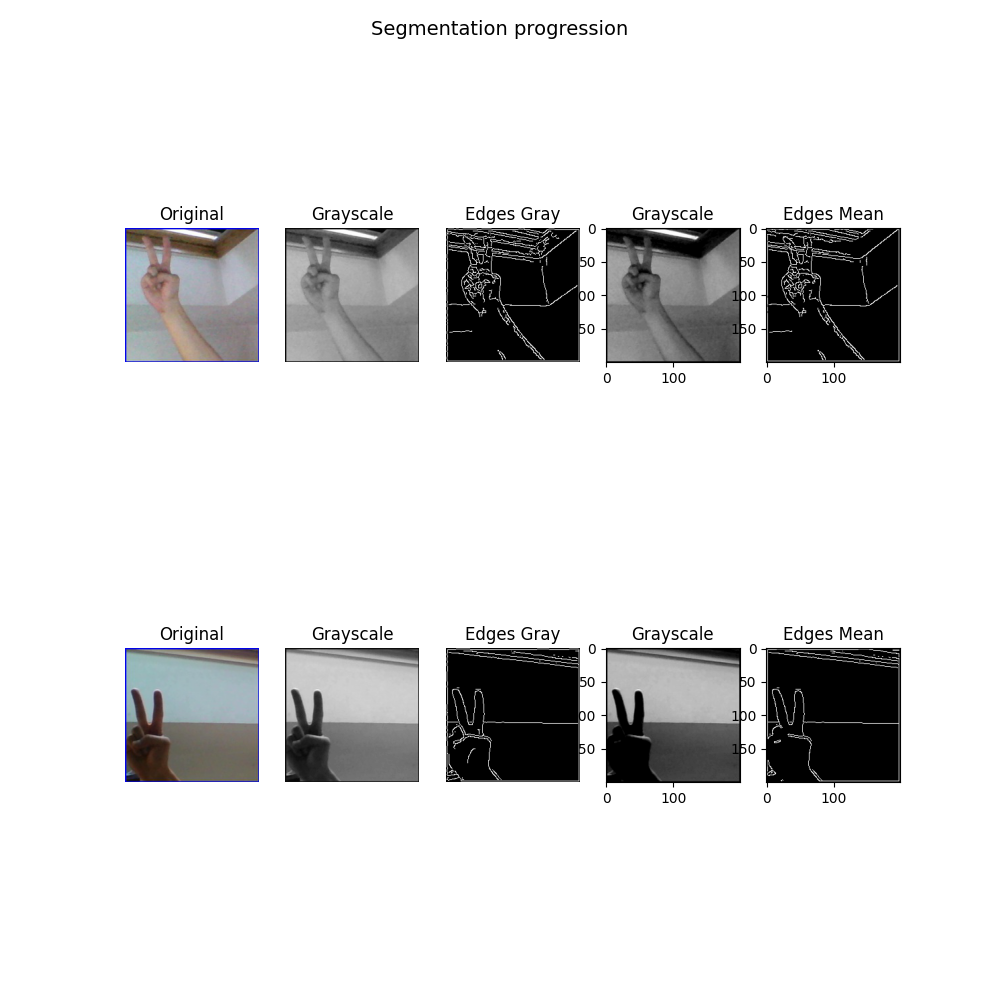

In [25]:
framesdir = "../splitDataset/training/V/"
fnames = glob.glob(framesdir + "*.jpg")
fnames = [os.path.basename(name) for name in fnames]

num_different_images = 2

random_indeces = np.random.choice(len(fnames), num_different_images, replace=False)
chosen_fnames = np.take(fnames, random_indeces)

sigma1 = 0.1
sigma2 = 0.25
sigma3 = 0.5
sigma4 = 1
sigma5 = 3

fig, ax = plt.subplots(num_different_images,5,figsize=(10,10))
fig.suptitle("Segmentation progression", fontsize=14)

for i in range(len(chosen_fnames)):
    original_image = imageio.imread(framesdir + chosen_fnames[i])
    gray_img = rgb2gray(original_image)
    
    # mean center the gray image
    mean_centered_gray_img = gray_img - np.mean(gray_img)*0.5    
    mean_centered_gray_img = np.where(mean_centered_gray_img < 0, 0, mean_centered_gray_img)
    
    
    
    # perform canny edge detector on the different rgb channels
    edges_gray = feature.canny(gray_img, sigma=0.5)
    edges_mean_centered = feature.canny(mean_centered_gray_img, sigma=0.5)
    
    # edges on top of normal grayscale img
    
    

    ax[i][0].imshow(original_image)
    ax[i][0].set_title("Original")
    ax[i][1].imshow(gray_img, cmap='gray')
    ax[i][1].set_title("Grayscale")
    ax[i][2].imshow(edges_gray, cmap='gray')
    ax[i][2].set_title("Edges Gray")
    ax[i][3].imshow(mean_centered_gray_img, cmap='gray')
    ax[i][3].set_title("Grayscale")
    ax[i][4].imshow(edges_mean_centered, cmap='gray')
    ax[i][4].set_title("Edges Mean")
#     ax[i][3].imshow(img_edges, cmap='gray')
#     ax[i][3].set_title("Canny on R, G, B")

for j in range(3):
    for i in range(len(chosen_fnames)):
        ax[i][j].axis("off")

In [3]:
# play around with black and white images
## mean-centering
## overlaying edges
## 